<a href="https://colab.research.google.com/github/matejanos/data_in_the_wild/blob/master/data_in_the_wild_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visualization

In [10]:
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import io

from google.colab import files
uploaded = files.upload()

csv_data_group_1 = pd.read_csv(io.StringIO(uploaded['data_final.csv'].decode('utf-8')))
csv_data_group_2 = pd.read_csv(io.StringIO(uploaded['data_final_2.csv'].decode('utf-8')))
influencers_dataframe = pd.read_csv(io.StringIO(uploaded['influencers_final.csv'].decode('utf-8')))

print("influencers", influencers_dataframe.head())
print(len(csv_data_group_1))


# Declare a list that is to be converted into a column
labels_for_group_1 = []
labels_for_group_2 = []
labels_for_group_3 = []
# Opening JSON file
output_json_group_1 = json.loads(uploaded['labeling_output.json'].decode('utf-8'))
output_json_group_2 = json.loads(uploaded['labeling_output_2.json'].decode('utf-8'))
output_json_group_3 = json.loads(uploaded['labeling_output_3.json'].decode('utf-8'))

#output_json_group_1 = open(uploaded['labeling_output.json'])
#output_json_group_2 = open(uploaded['labeling_output.json'])

print(output_json_group_1)

# returns JSON object as
# a dictionary

#json_data_group_1 = json.load(output_json_group_1)
#json_data_group_2 = json.load(output_json_group_2)

print(len(output_json_group_1))

ids_group_1 = []
ids_group_2 = []
ids_group_3 = []

for post in output_json_group_1:
    id = post.get("id")
    ids_group_1.append(id)
    annotations = post.get("annotations")
    if(not annotations[0].get("result")):
      label = "None"
    else:
      label = annotations[0].get("result")[0].get("value").get("choices")[0]
    labels_for_group_1.append(label)

for post in output_json_group_2:
    id = post.get("id")
    ids_group_2.append(id)
    annotations = post.get("annotations")
    if(not annotations[0].get("result")):
      label = "None"
    else:
      label = annotations[0].get("result")[0].get("value").get("choices")[0]
    labels_for_group_2.append(label)

for post in output_json_group_3:
    id = post.get("id")
    ids_group_3.append(id)
    annotations = post.get("annotations")
    if(not annotations[0].get("result")):
      label = "None"
    else:
      label = annotations[0].get("result")[0].get("value").get("choices")[0]
    labels_for_group_3.append(label)

print(labels_for_group_1)

label_and_id_df_1 = pd.DataFrame(
    {'id': ids_group_1,
     'label': labels_for_group_1
    })

label_and_id_df_2 = pd.DataFrame(
    {'id': ids_group_2,
     'label': labels_for_group_2
    })

label_and_id_df_3 = pd.DataFrame(
    {'id': ids_group_3,
     'label': labels_for_group_3
    })

label_and_id_df_1 = label_and_id_df_1.sort_values(by=['id'])
label_and_id_df_2 = label_and_id_df_2.sort_values(by=['id'])
print("2: ", label_and_id_df_2.shape)
label_and_id_df_3 = label_and_id_df_3.sort_values(by=['id'])
print("3: ", label_and_id_df_3.shape)
print("csv:", csv_data_group_2.shape)

#appending 2 and 3 together

label_and_id_df_2_and_3 = label_and_id_df_2.append(label_and_id_df_3, ignore_index=True)


print(label_and_id_df_1.head())
csv_data_group_1['label'] = label_and_id_df_1.label.values.tolist()
csv_data_group_2['label'] = label_and_id_df_2_and_3.label.values.tolist()



influencers    Unnamed: 0                             name    user_id    insta_handle  \
0           0  Herdís Athena Þorsteinsdóttir  202803290    herdisathena   
1           1       Mathilde Marie Holst Roien  342594072  mathilde_roien   
2           2                   JOSEFINE  H. J    2193977      josefinehj   
3           3                       Birta Hlin    5611971       birtahlin   
4           4                   Katarina Krebs   14592268   katarinakrebs   

   follow_count  
0          1954  
1         63494  
2       1238613  
3         57186  
4         53966  
1288
[{'id': 1629, 'annotations': [{'id': 2122, 'completed_by': 2, 'result': [{'value': {'choices': ['None']}, 'id': '3xKoqXrWPL', 'from_name': 'choice', 'to_name': 'image', 'type': 'choices', 'origin': 'manual'}], 'was_cancelled': False, 'ground_truth': False, 'created_at': '2022-12-05T13:59:10.743623Z', 'updated_at': '2022-12-05T13:59:10.743623Z', 'lead_time': 2.745, 'prediction': {}, 'result_count': 0, 'task': 

,Unnamed: 0,url,date_time,caption,likes,user_id,post_id,label
0,0,https://instagram.fist6-1.fna.fbcdn.net/v/t51....,2022-11-28 23:18:33,NaN,252,202803290,1,cargo_skirt
1,1,https://instagram.fist6-1.fna.fbcdn.net/v/t51....,2022-11-28 23:13:50,NaN,3,202803290,2,None
2,2,https://scontent-ams4-1.cdninstagram.com/v/t51...,2022-11-18 21:02:24,NaN,3,202803290,3,jeans_wide
3,3,https://instagram.fist6-3.fna.fbcdn.net/v/t51....,2022-11-08 22:07:18,shoes and shenanigans 👽🧚🏼‍♂️,3,202803290,4,maxi_skirts
4,4,https://instagram.fist6-2.fna.fbcdn.net/v/t51....,2022-11-08 22:07:18,shoes and shenanigans 👽🧚🏼‍♂️,3,202803290,4,None
...,...,...,...,...,...,...,...,...
3373,2085,https://instagram.fist6-1.fna.fbcdn.net/v/t51....,2022-06-06 18:12:27,"What a weekend 🥹 Full of Love, family and frie...",3,345869154,502,None
3374,2086,https://instagram.fist6-3.fna.fbcdn.net/v/t51....,2022-06-06 18:12:27,"What a weekend 🥹 Full of Love, family and frie...",3,345869154,502,None
3375,2087,https://instagram.fist6-2.fna.fbcdn.net/v/t51....,2022-06-06 18:12:27,"What a weekend 🥹 Full of Love, family and frie...",3,345869154,502,None
3376,2088,https://instagram.fist6-3.fna.fbcdn.net/v/t51....,2022-06-06 18:12:27,"What a weekend 🥹 Full of Love, family and frie...",3,345869154,502,None


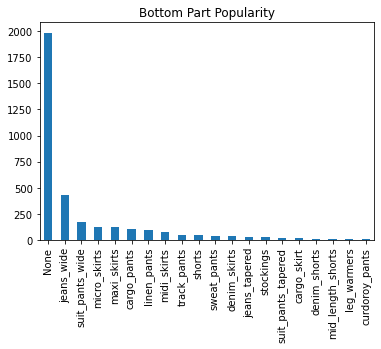

In [2]:
frames = [csv_data_group_1, csv_data_group_2]
  
combined_dataframe = pd.concat(frames).reset_index(drop=True)

display(combined_dataframe)

combined_dataframe.label.value_counts().plot(title='Bottom Part Popularity',kind='bar')
plt.show()

In [3]:


linen_df = combined_dataframe.loc[(combined_dataframe['label'] == 'maxi_skirts'), ['label', 'date_time']]
print(linen_df.head())

           label            date_time
3    maxi_skirts  2022-11-08 22:07:18
64   maxi_skirts  2022-12-01 17:00:27
217  maxi_skirts  2022-09-09 17:26:19
387  maxi_skirts  2022-10-17 15:33:33
402  maxi_skirts  2022-09-25 16:16:15


In [4]:
linen_df_count = linen_df['date_time'].value_counts().sort_index().reset_index()
linen_df_count.columns = ['DATE','linen_pants_count']
print(linen_df_count)

                   DATE  linen_pants_count
0   2022-06-10 10:17:40                  1
1   2022-06-16 20:21:04                  1
2   2022-06-22 16:59:59                  2
3   2022-06-29 17:22:50                  1
4   2022-07-11 16:53:22                  2
..                  ...                ...
60  2022-11-29 17:21:40                  2
61  2022-12-01 17:00:27                  1
62  2022-12-02 12:42:34                  1
63  2022-12-03 20:49:31                  2
64  2022-12-04 21:40:15                  2

[65 rows x 2 columns]


In [5]:
import datetime as dt

linen_df_count['DATE'] = pd.to_datetime(linen_df_count['DATE'], format="%Y-%m-%d %H:%M:%S")
linen_df_count['linen_pants_count'] = linen_df_count['linen_pants_count'].astype('int')
print(linen_df_count)

linen_df_timeseries = linen_df_count.resample('M', on='DATE').linen_pants_count.sum().reset_index()
linen_df_timeseries.columns = ['DATE','linen_pants_count']

linen_df_timeseries['DATE'] = pd.to_datetime(linen_df_timeseries['DATE'], format='%m').dt.month_name()


print(linen_df_timeseries)
print(linen_df_timeseries.columns)

                  DATE  linen_pants_count
0  2022-06-10 10:17:40                  1
1  2022-06-16 20:21:04                  1
2  2022-06-22 16:59:59                  2
3  2022-06-29 17:22:50                  1
4  2022-07-11 16:53:22                  2
..                 ...                ...
60 2022-11-29 17:21:40                  2
61 2022-12-01 17:00:27                  1
62 2022-12-02 12:42:34                  1
63 2022-12-03 20:49:31                  2
64 2022-12-04 21:40:15                  2

[65 rows x 2 columns]
        DATE  linen_pants_count
0       June                  5
1       July                 18
2     August                 12
3  September                 11
4    October                 34
5   November                 35
6   December                  6
Index(['DATE', 'linen_pants_count'], dtype='object')


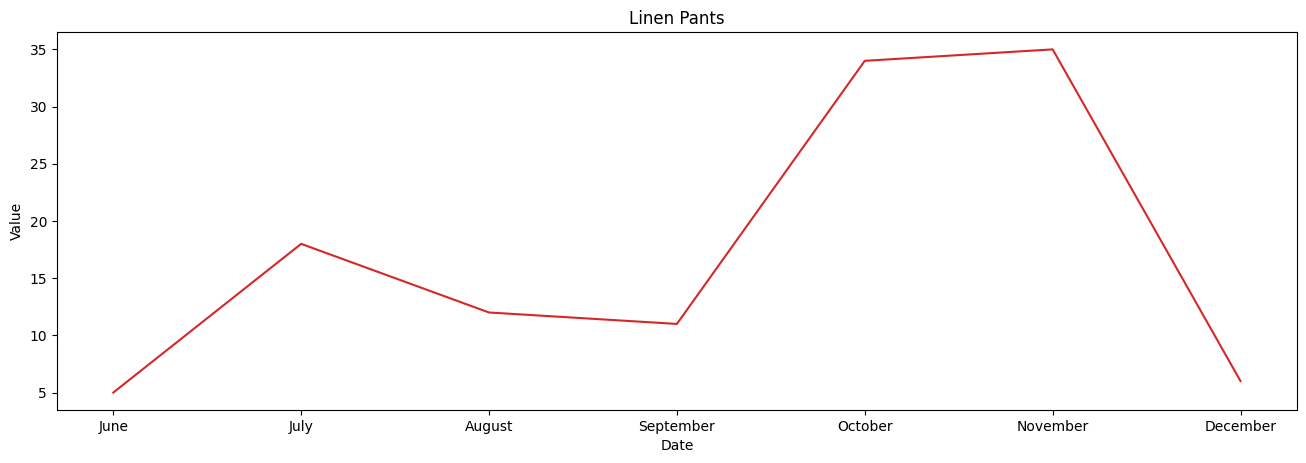

In [7]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(linen_df_timeseries, x=linen_df_timeseries.DATE, y=linen_df_timeseries.linen_pants_count, title='Linen Pants')    